In [1]:
%load_ext autoreload
%autoreload 2
from sir_model import SIR_Network_Model, State
import si_model as si_m
import networkx as nx
import matplotlib.pylab as plt
%matplotlib inline


In [6]:
sir_model = SIR_Network_Model()

cmap = {State.infected: 'r', State.susceptible: 'g', State.resistant:'k'}
pos = nx.spring_layout(sir_model.network.graph)

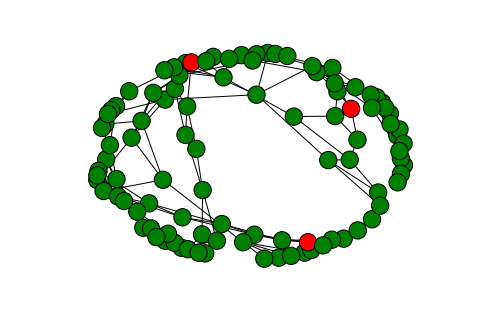

In [7]:
pos = nx.spring_layout(sir_model.network.graph)
colors = list(map(lambda x: cmap[x.state], sir_model.network.graph.nodes()))
nx.draw(sir_model.network.graph,pos,node_color=colors,cmap=plt.cm.get_cmap("Dark2"))

In [8]:
sir_model.run_model()


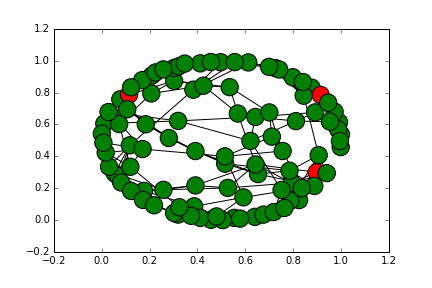
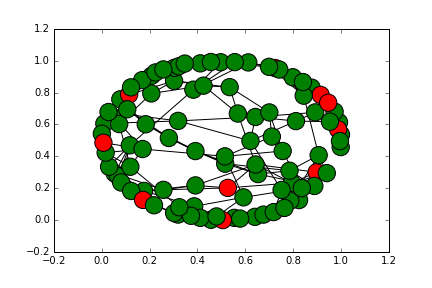
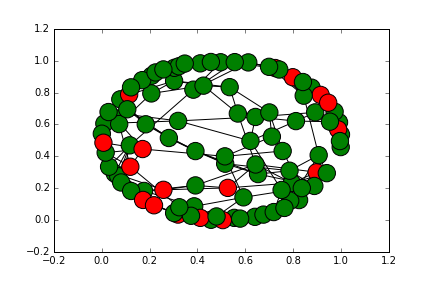
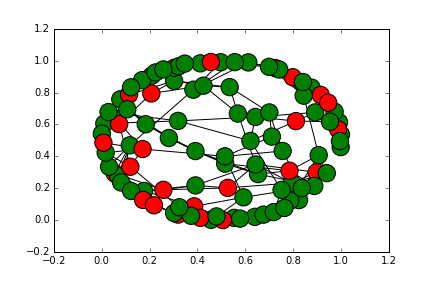
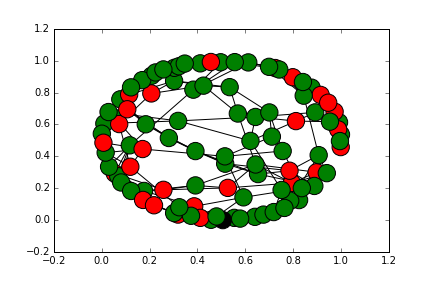
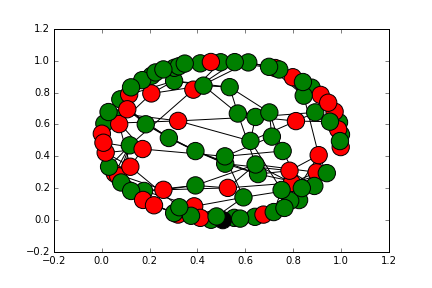
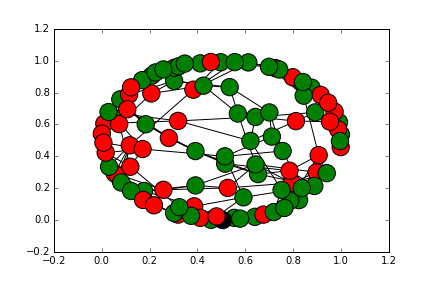
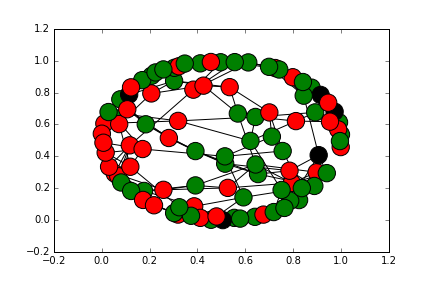
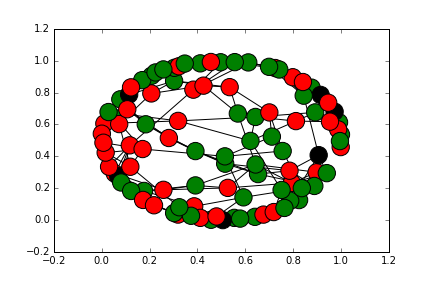
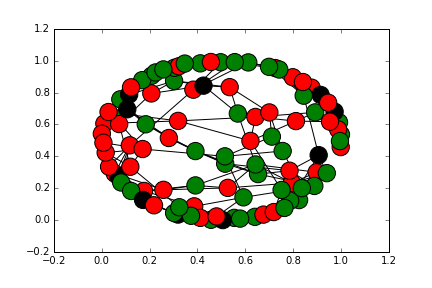
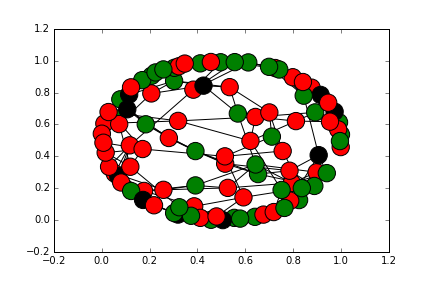
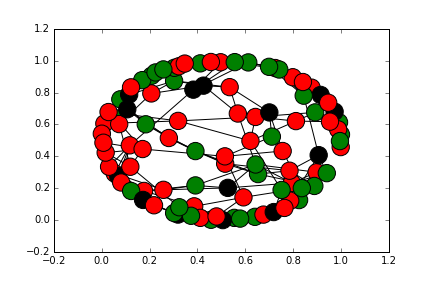
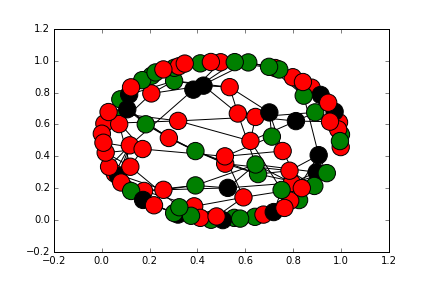
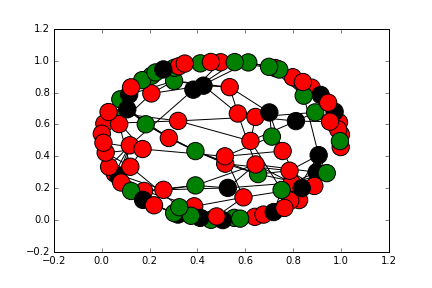
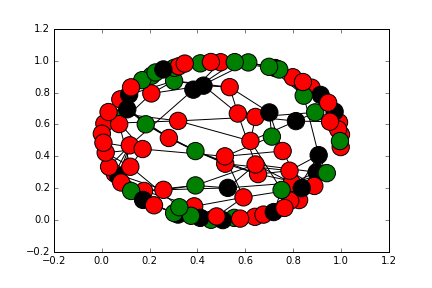
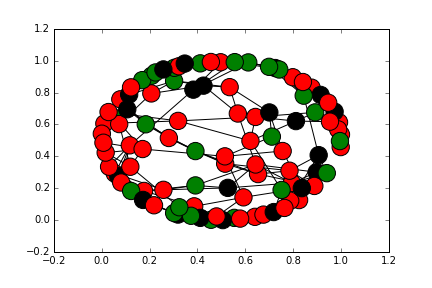
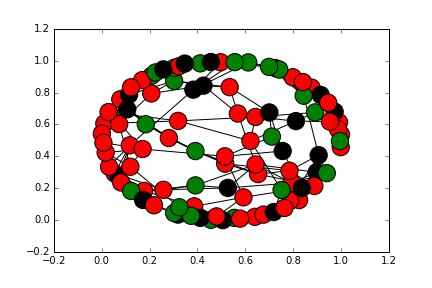
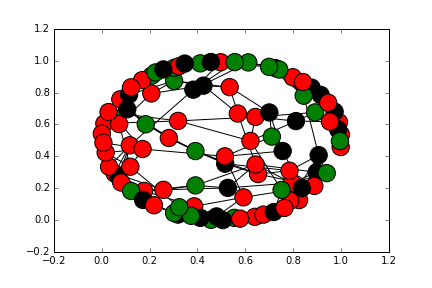
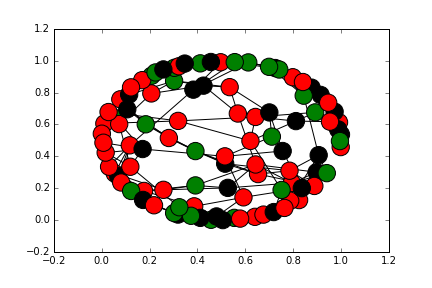
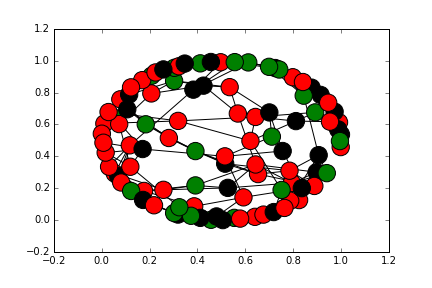
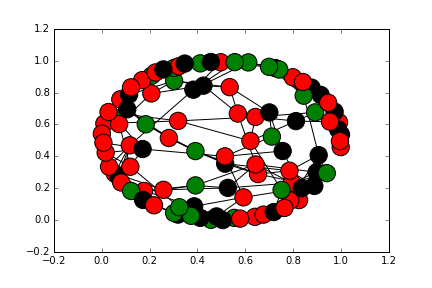
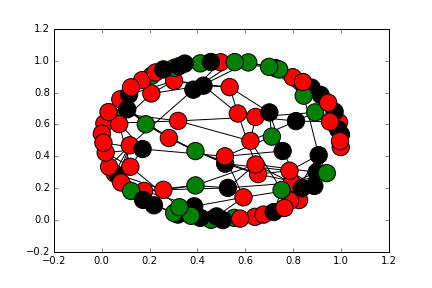
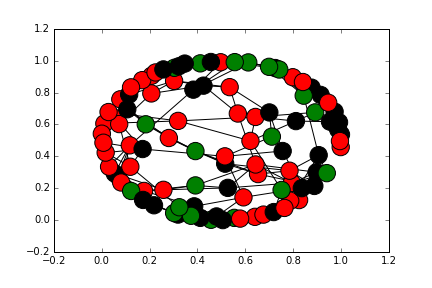
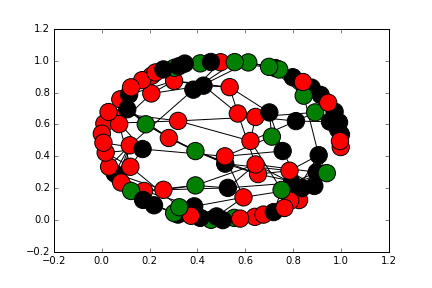
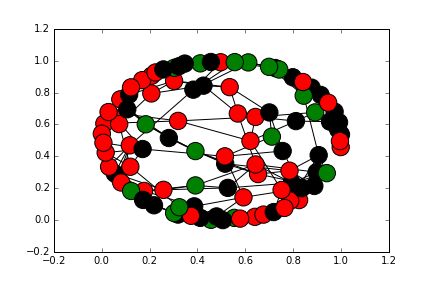
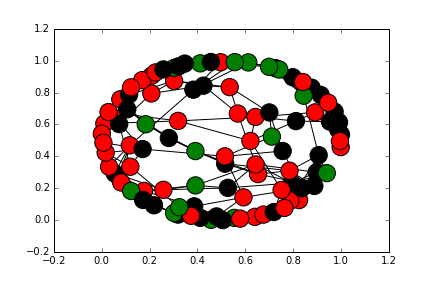
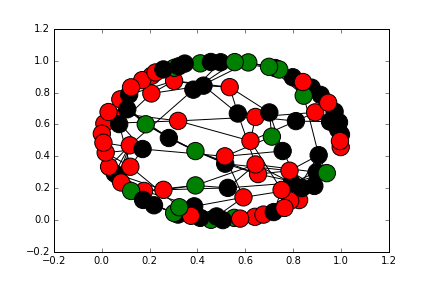
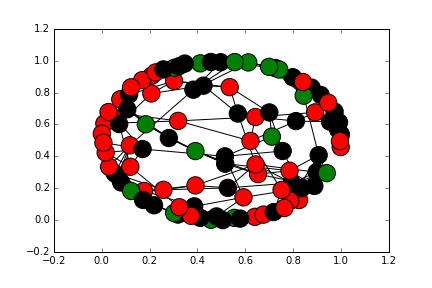
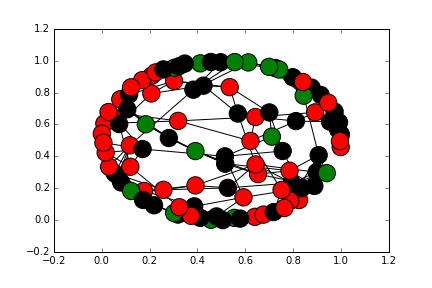
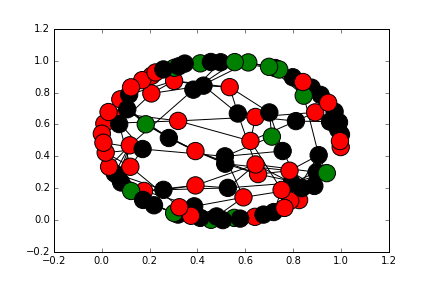
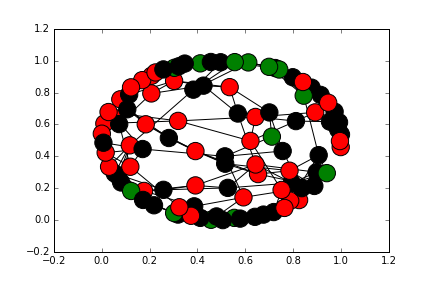
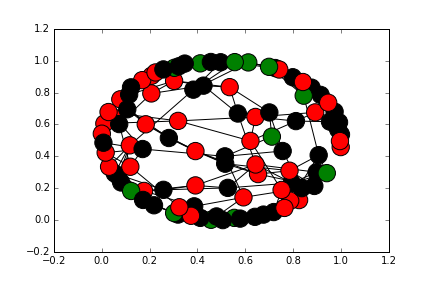
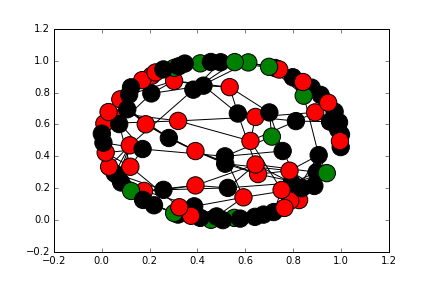
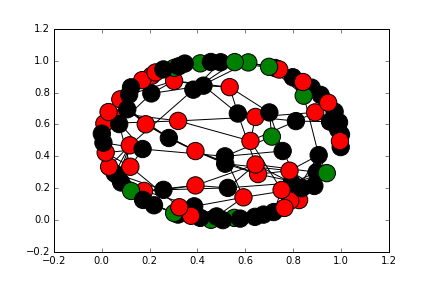
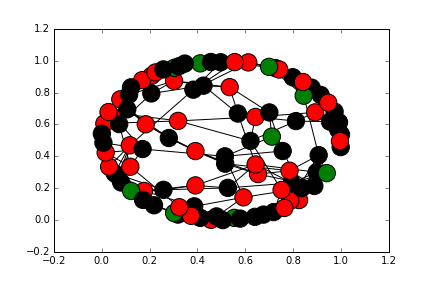
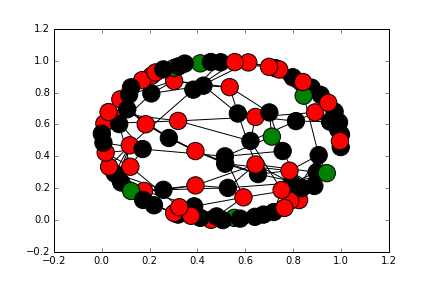
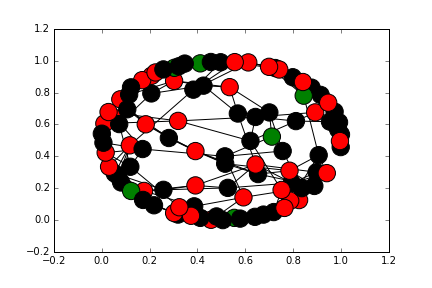
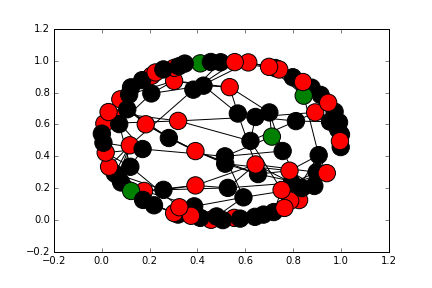
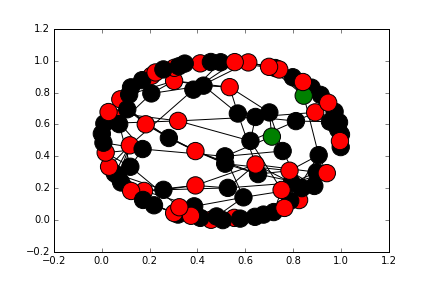
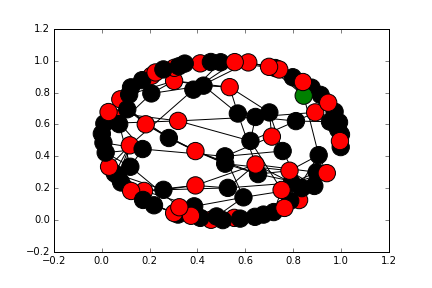
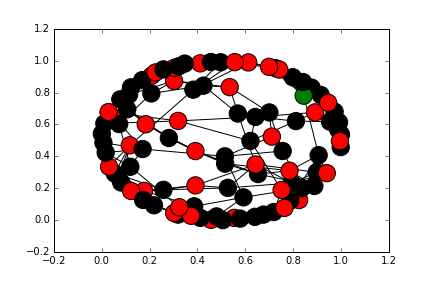
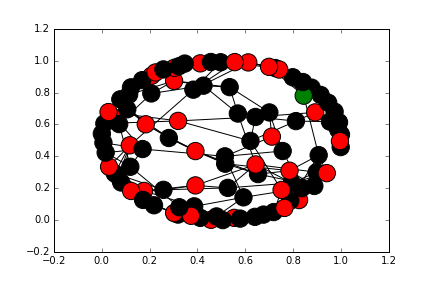
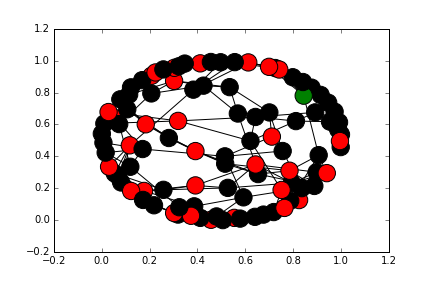
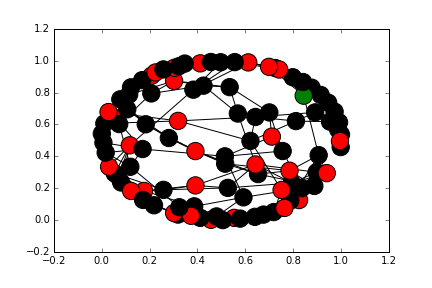
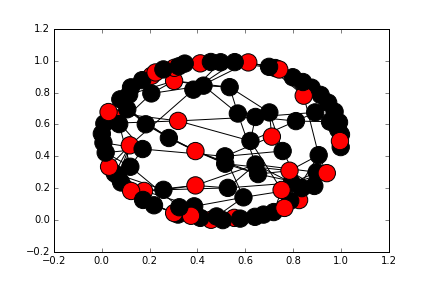
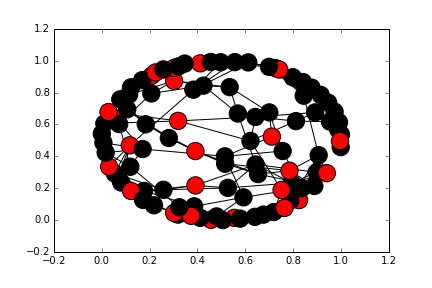
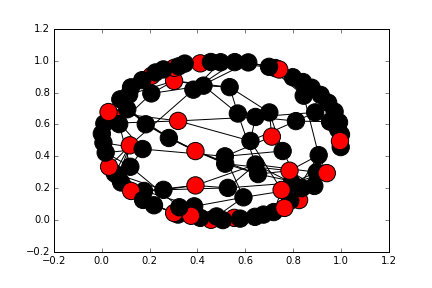
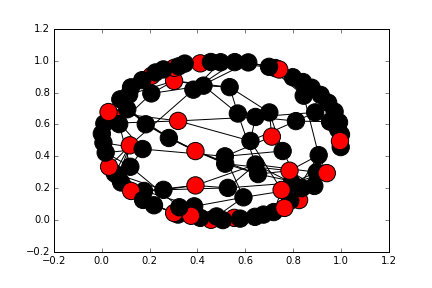
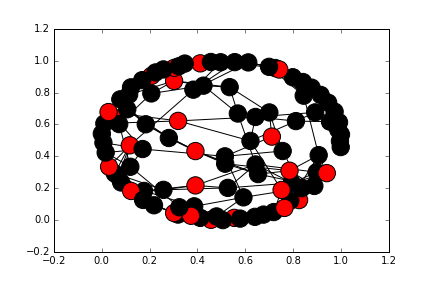
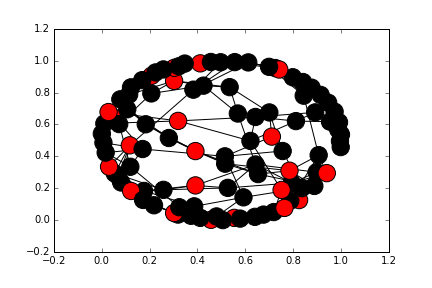
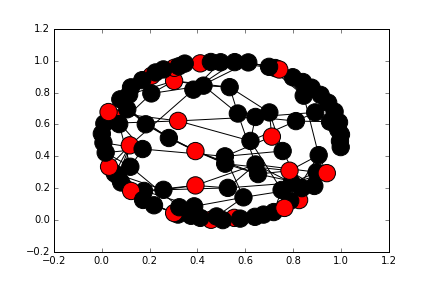
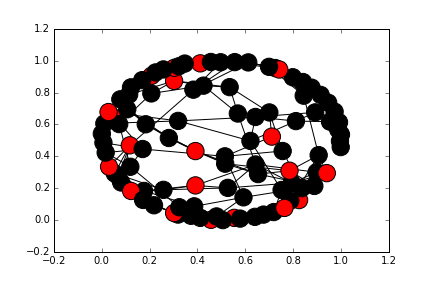
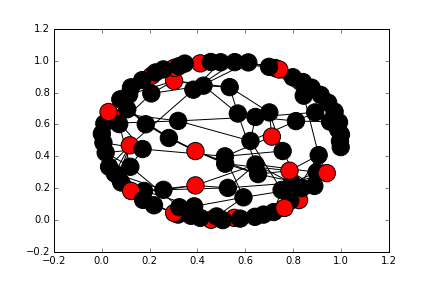
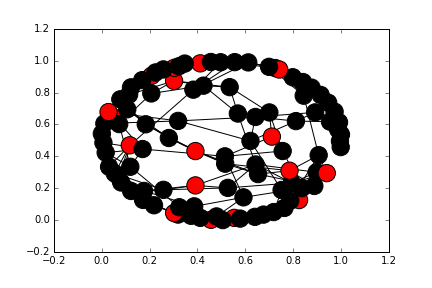
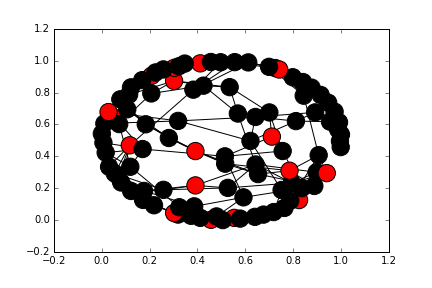
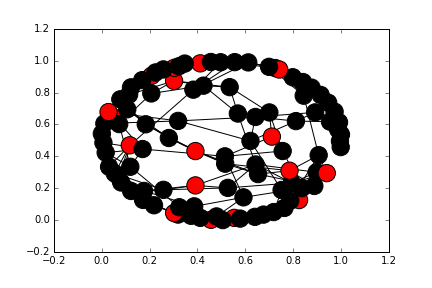
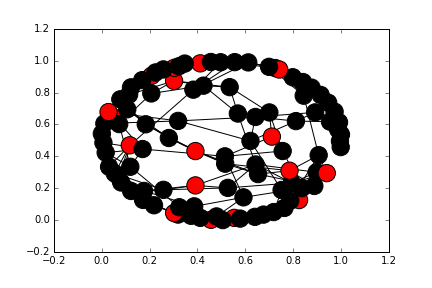
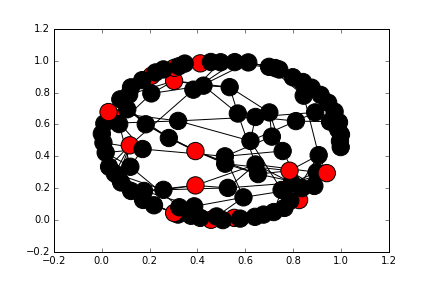
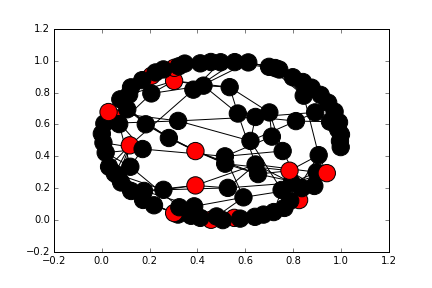
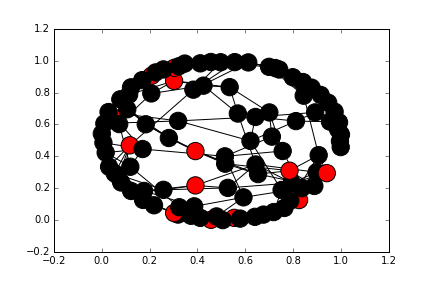
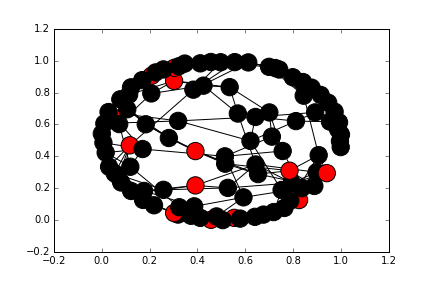
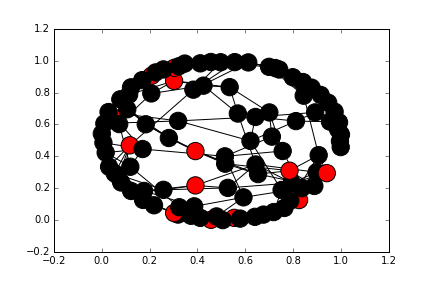
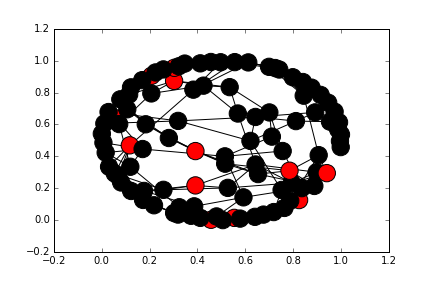
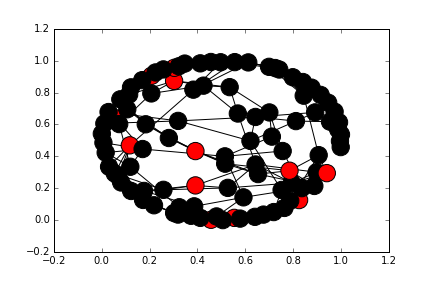
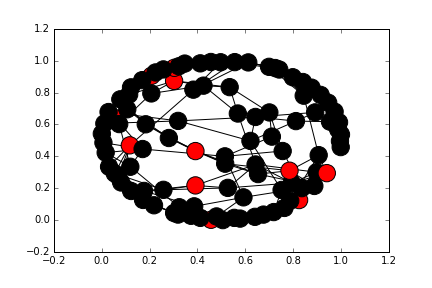
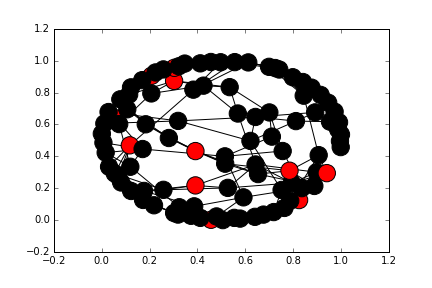
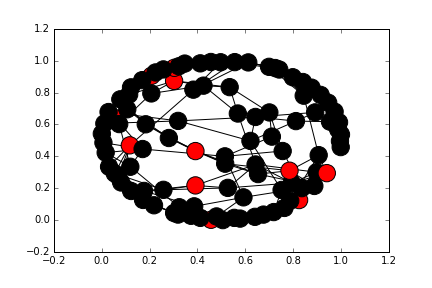
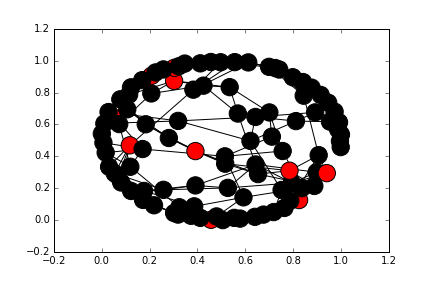
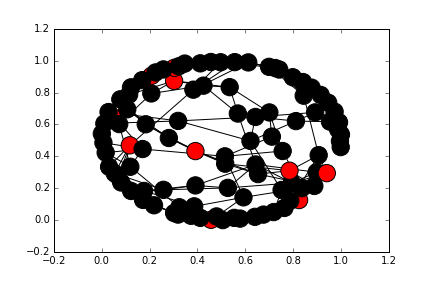
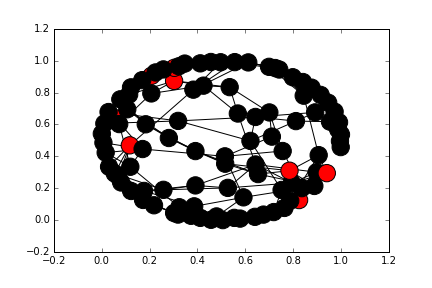
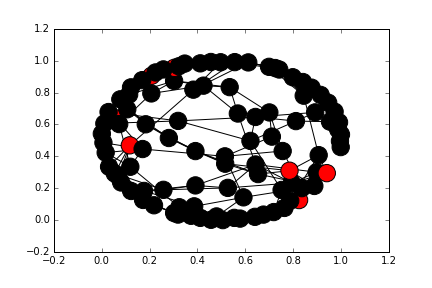
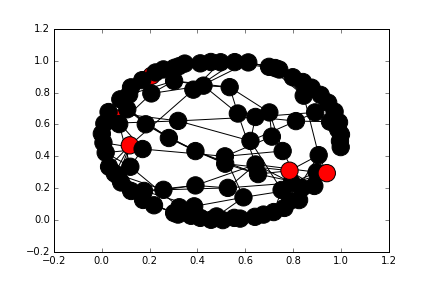
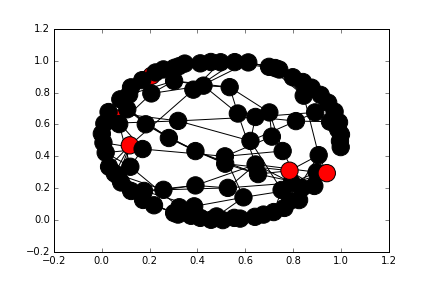
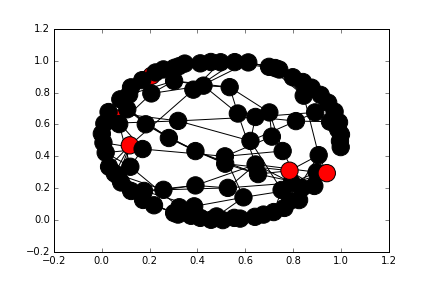
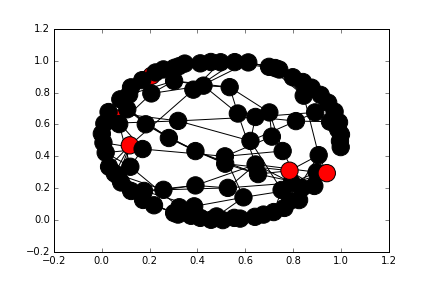
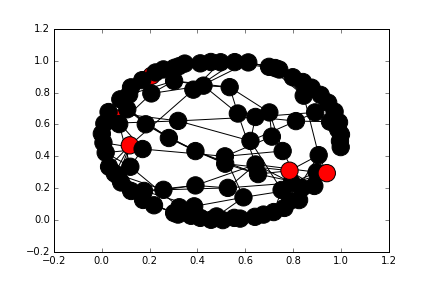
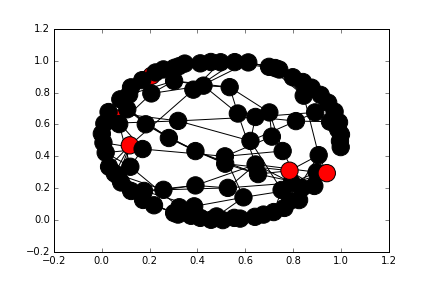
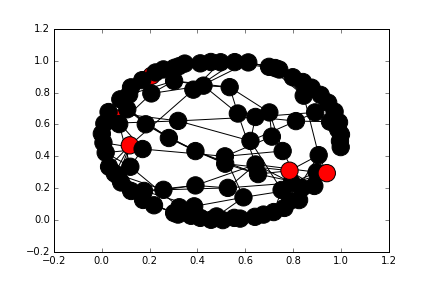
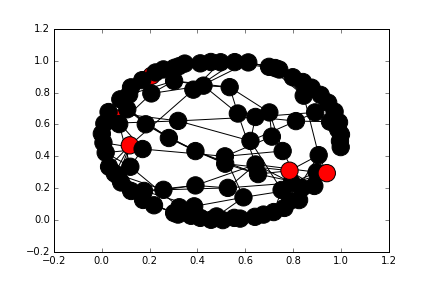
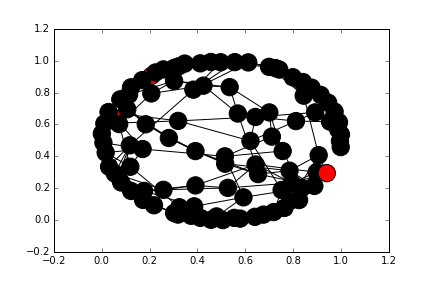

In [39]:
from matplotlib import animation
from JSAnimation import IPython_display

fig = plt.figure()
ax = plt.axes()
nodes = nx.draw_networkx_nodes(sir_model.network.graph,pos=pos,ax=ax,node_color=colors,cmap=plt.cm.get_cmap("Dark2"))
nx.draw_networkx_edges(sir_model.network.graph,pos=pos,ax=ax,node_color=colors,cmap=plt.cm.get_cmap("Dark2"))

n_steps = sir_model.dc.get_agent_vars_dataframe().index.levels[0].shape[0]
def init():
    states = sir_model.dc.get_agent_vars_dataframe()['state'][0]
    colors = list(map(lambda x: cmap[State(states[x.unique_id])], sir_model.network.graph.nodes()))  
    nodes.set_facecolor(colors)
    return nodes,

def animate(i):    
    states = sir_model.dc.get_agent_vars_dataframe()['state'][i]
    colors = list(map(lambda x: cmap[State(states[x.unique_id])], sir_model.network.graph.nodes()))  
    nodes.set_facecolor(colors)
    return nodes,

animation.FuncAnimation(fig, animate, init_func=init, frames=min(80,n_steps-1), blit=True)

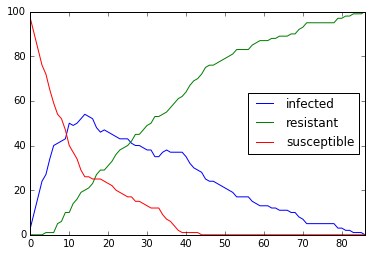

In [40]:
results = sir_model.dc.get_model_vars_dataframe()
results.plot()

In [16]:
from visualization import plot_spreading, node_colors

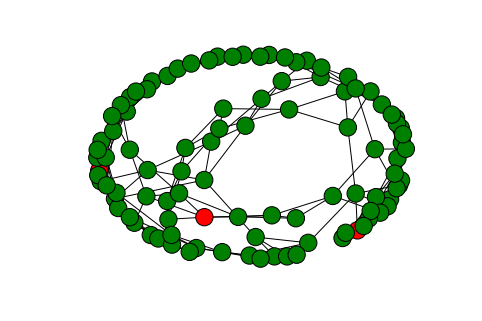

In [18]:
si_model = si_m.SI_Network_Model()
si_State = si_m.State
si_cmap = {si_State.infected: 'r', si_State.susceptible: 'g'}

colors = node_colors(si_cmap,si_model)
pos = nx.spring_layout(si_model.network.graph)

nx.draw(si_model.network.graph,pos,node_color=colors)

si_model.run_model()


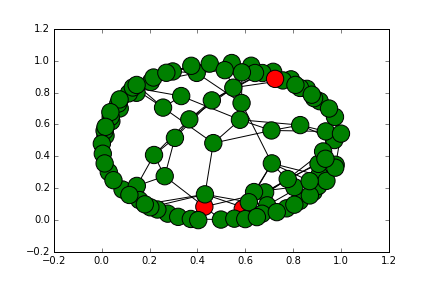
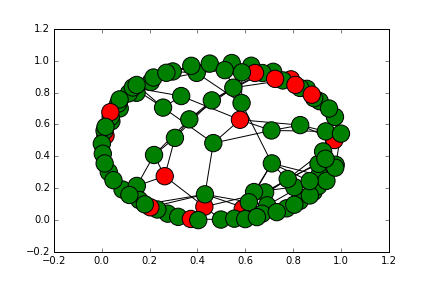
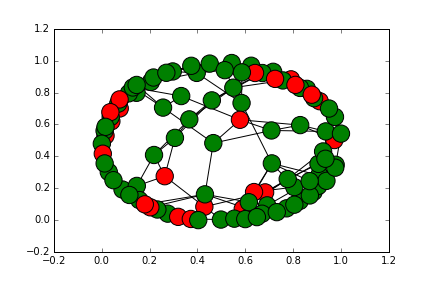
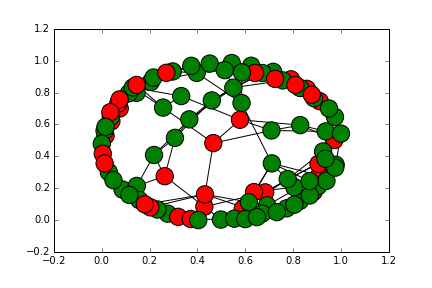
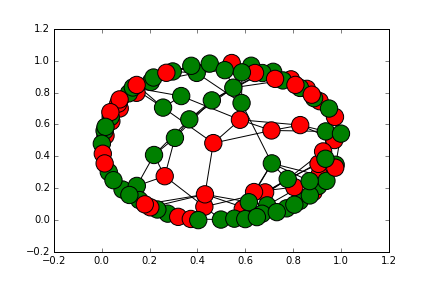
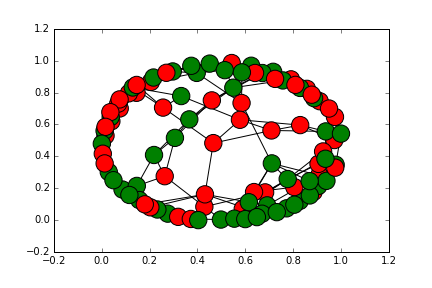
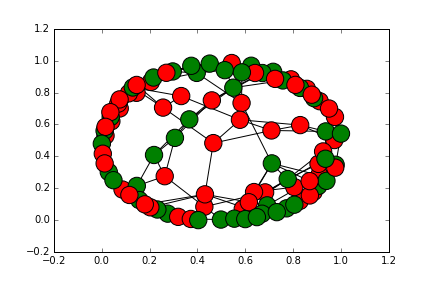
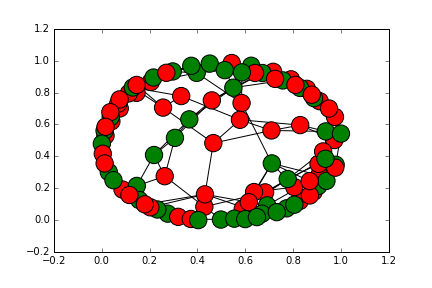
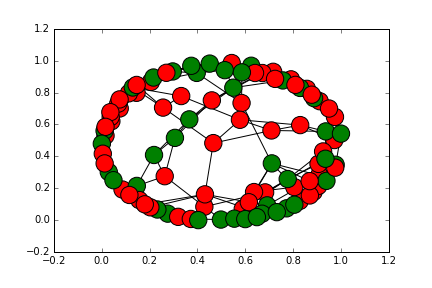
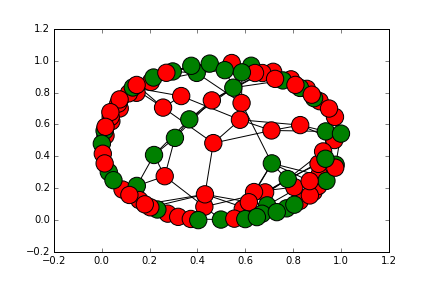
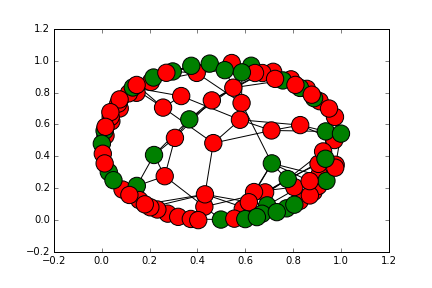
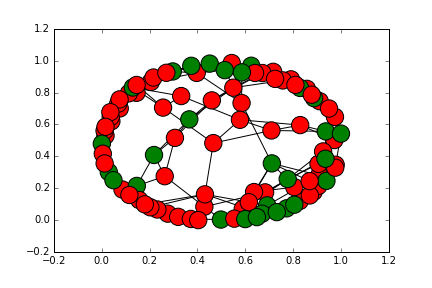
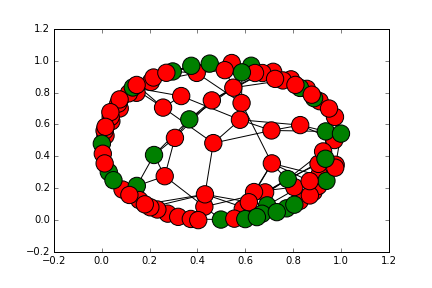
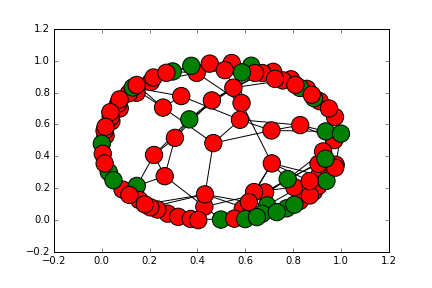
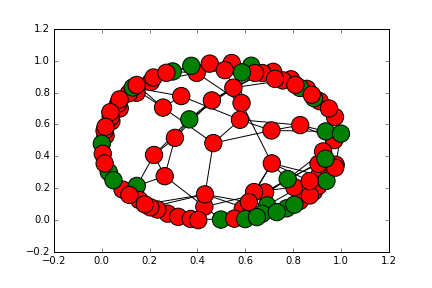
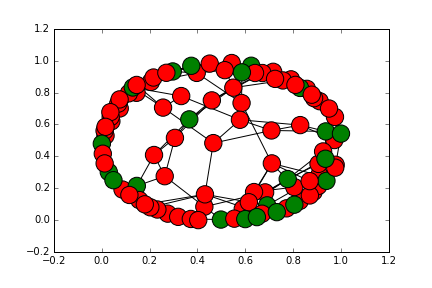
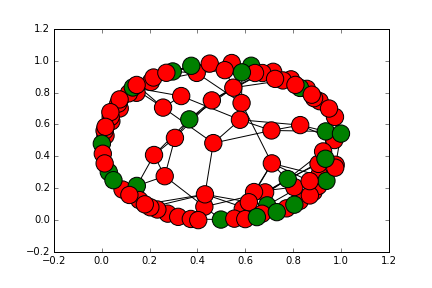
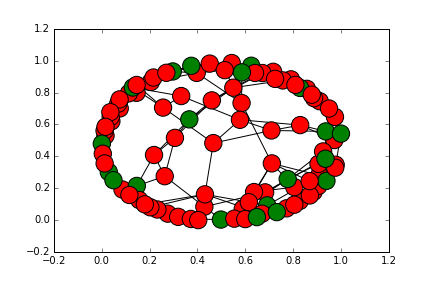
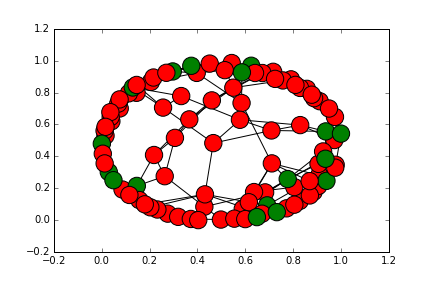
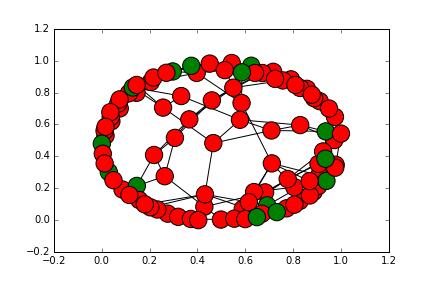
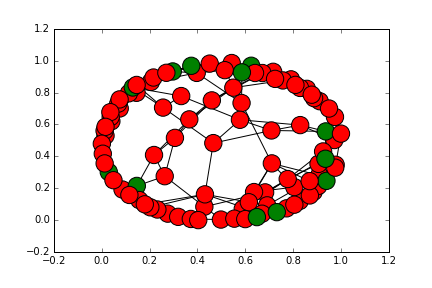
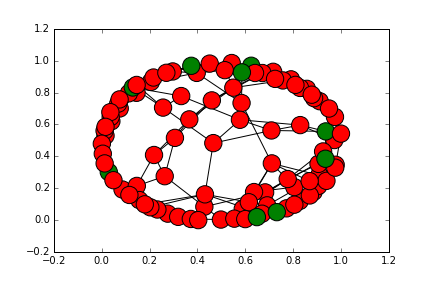
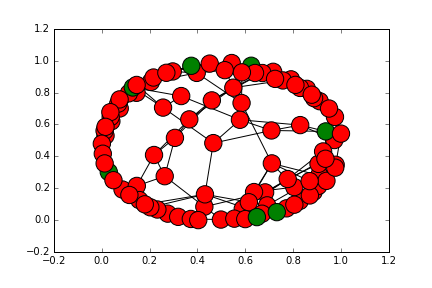
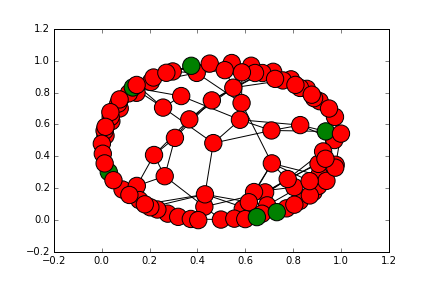
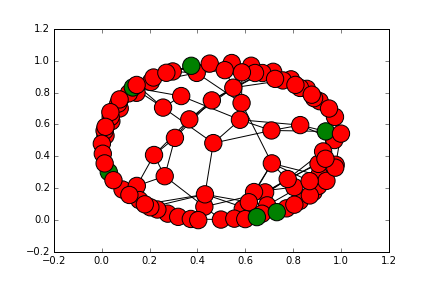
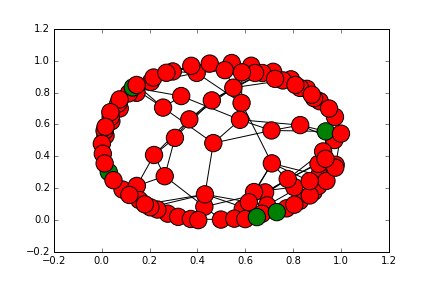
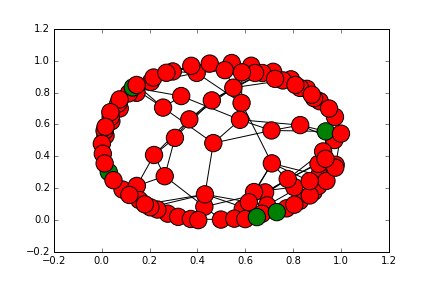
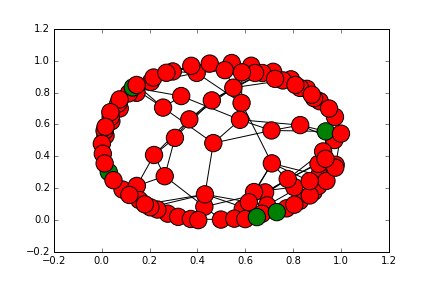
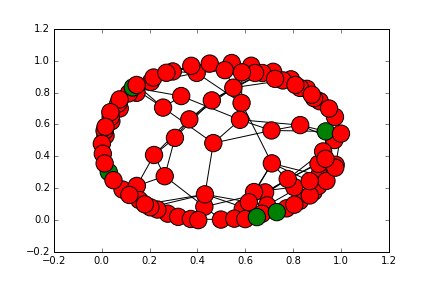
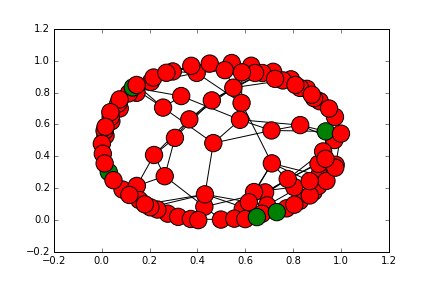
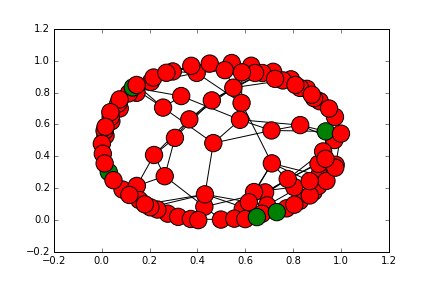
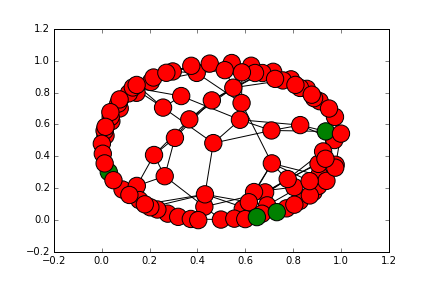
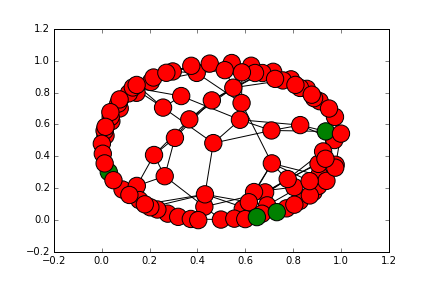
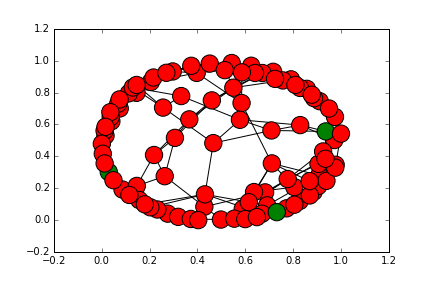
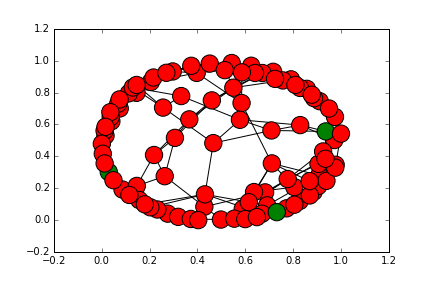
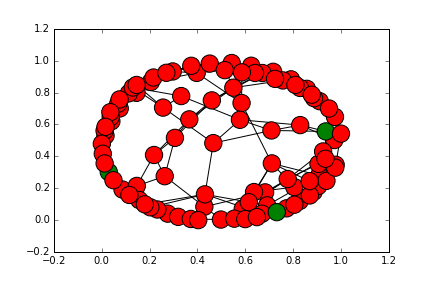
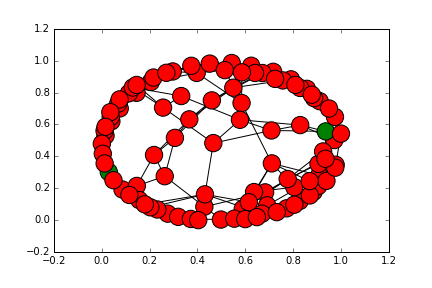
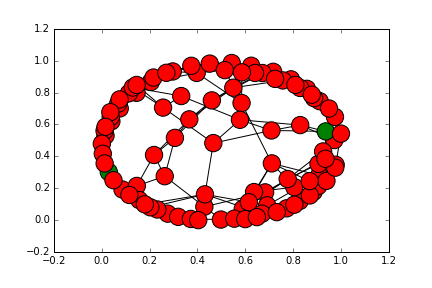
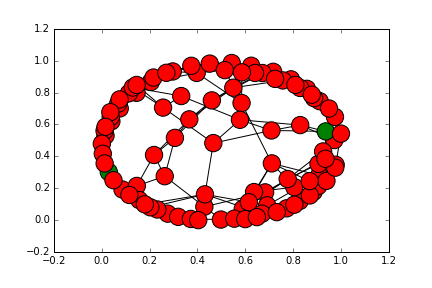
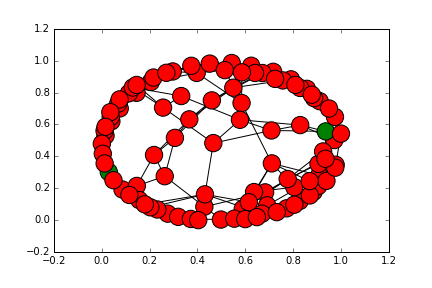
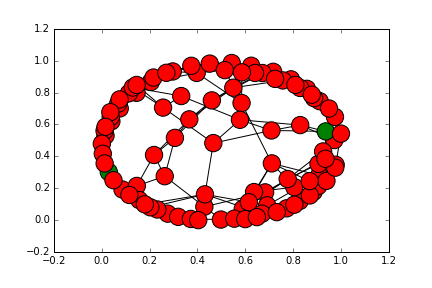
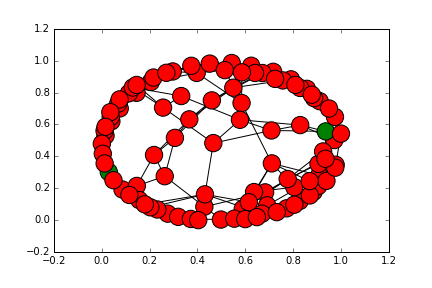
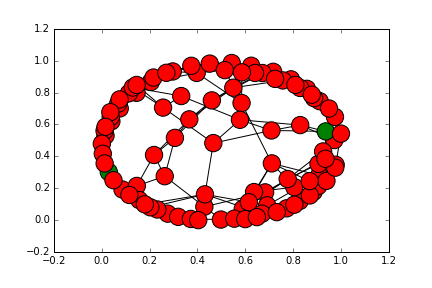
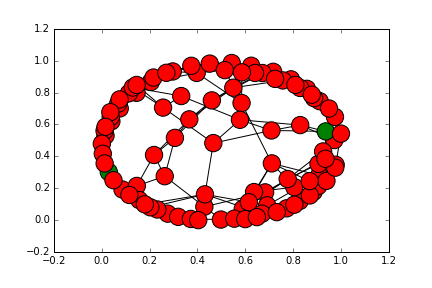
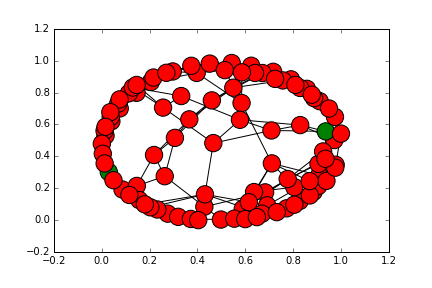
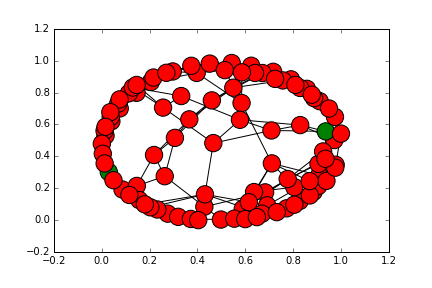
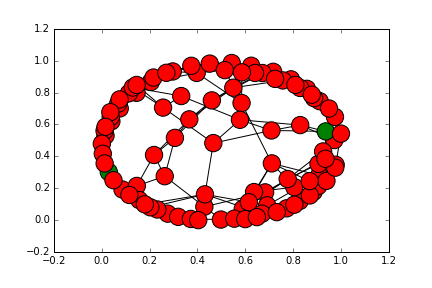
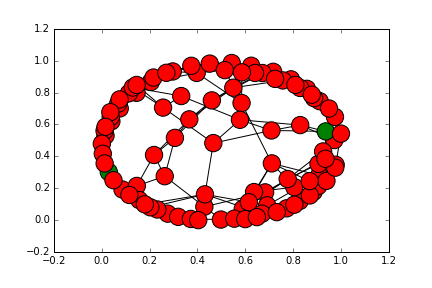
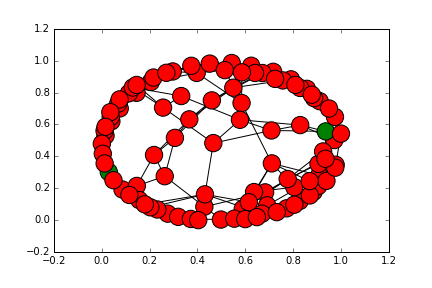
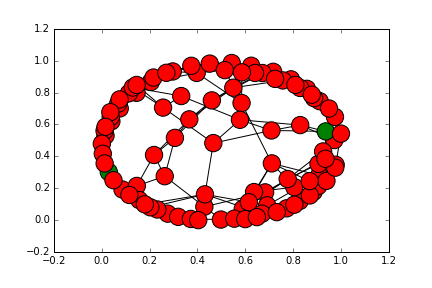
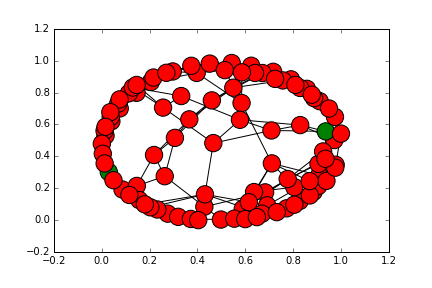
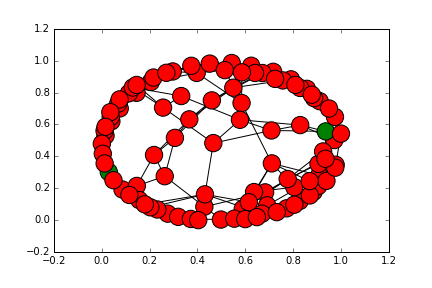
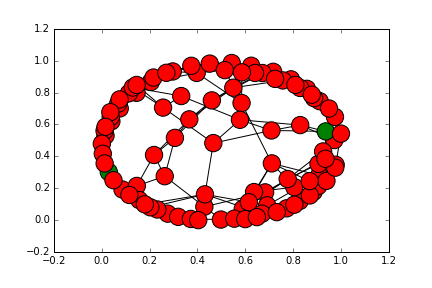
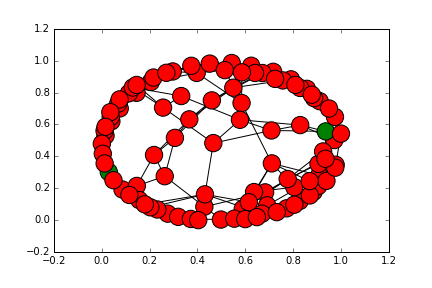
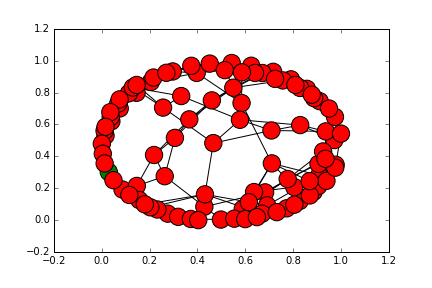
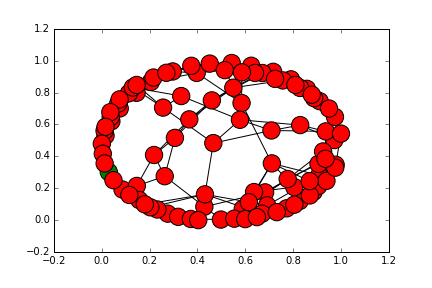
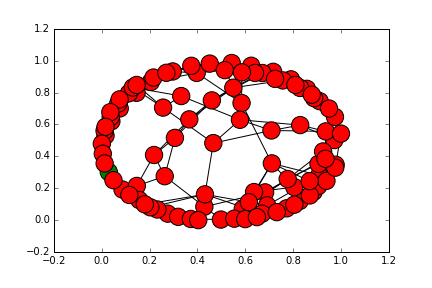
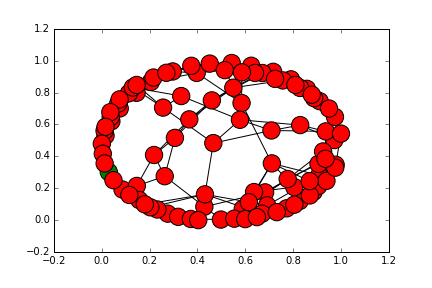
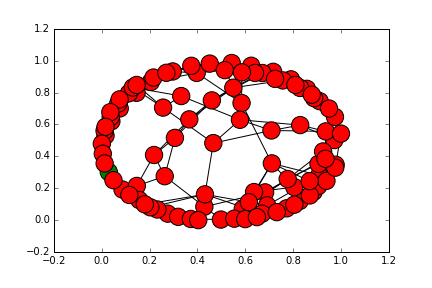
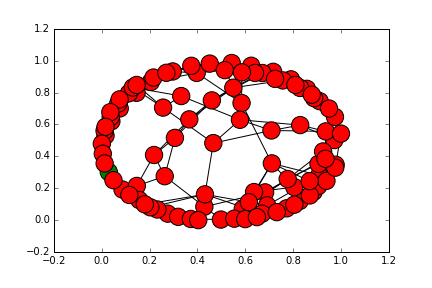
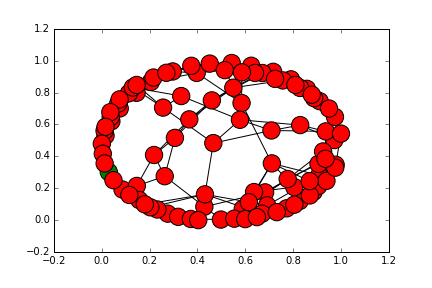
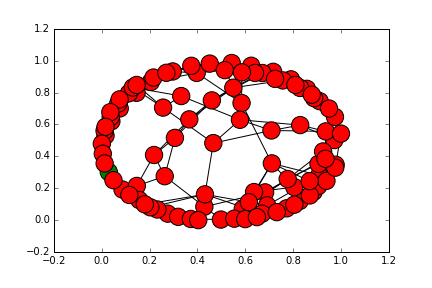
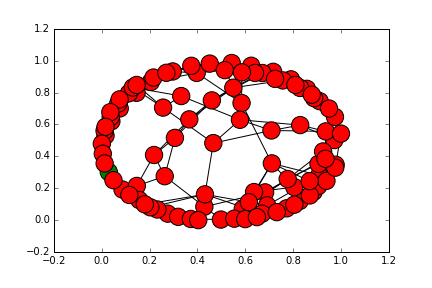
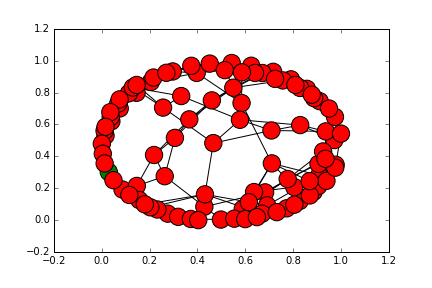
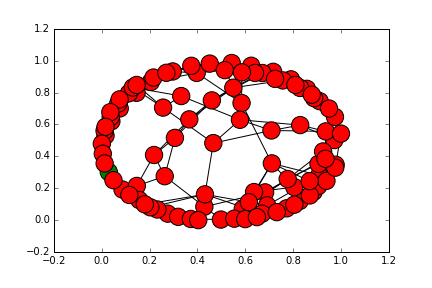
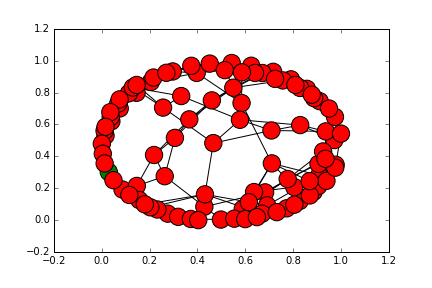
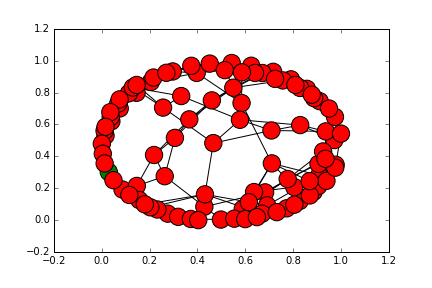
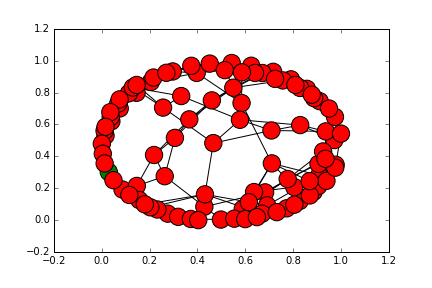
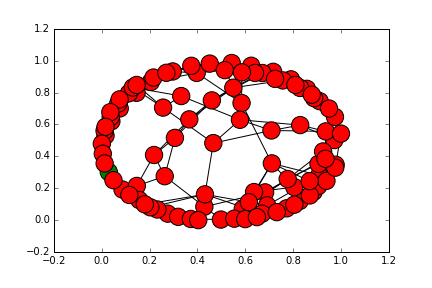
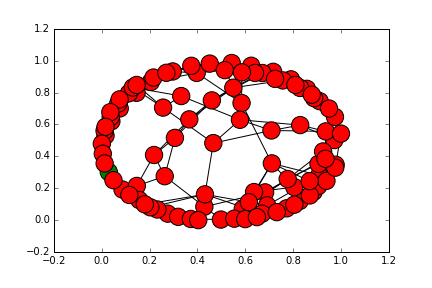
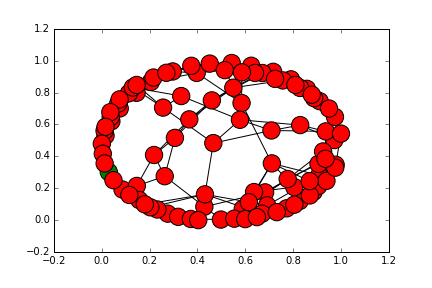

In [11]:
from JSAnimation import IPython_display
from matplotlib import animation

fig, animate, init, n_steps = plot_spreading(si_model,si_State, pos, cmap, colors)
animation.FuncAnimation(fig, animate, init_func=init, frames=min(80,n_steps-1), blit=True)

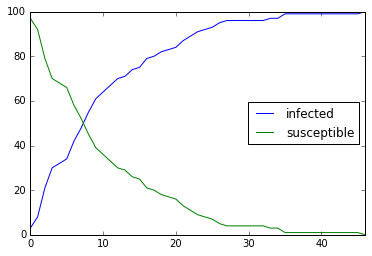

In [19]:
results = si_model.dc.get_model_vars_dataframe()
results.plot()